# Exploratory data analysis
- Target [Diagnosed diabetes] analysis and distribution
- Scatter plot visualisation
- Feature distribution


---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('../data/source_data/diabetes_dataset.csv')
data

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,46,Male,Other,Graduate,Upper-Middle,Unemployed,Former,1,136,8.3,...,45,150,116,113,109,14.58,5.55,26.0,Pre-Diabetes,0
99996,41,Female,White,Graduate,Middle,Employed,Never,3,76,8.8,...,55,123,146,96,146,9.02,5.97,24.4,Pre-Diabetes,0
99997,57,Female,Black,No formal,Upper-Middle,Employed,Former,4,121,9.9,...,50,111,184,93,132,2.57,5.21,27.6,No Diabetes,0
99998,47,Female,Black,Highschool,Lower-Middle,Retired,Never,3,52,5.9,...,68,91,116,106,117,9.81,5.53,26.4,Pre-Diabetes,0


### Target [Diagnosed diabetes] analysis

---

In the first section, we examined the distribution of the target variable using a bar chart. Now, we will explore the target again from a different perspective. As a starting point for our exploratory data analysis, it is important to understand how the target values are distributed.

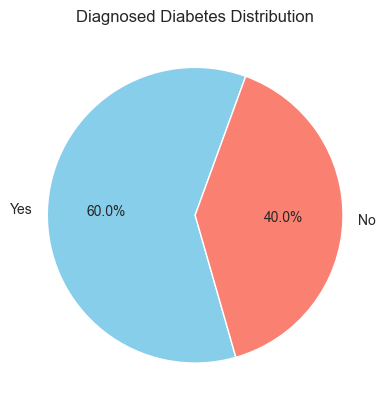

In [3]:
counts = data['diagnosed_diabetes'].value_counts()

plt.pie(
    counts,                   
    labels=['Yes', 'No'],     
    colors=['skyblue', 'salmon'], 
    autopct='%1.1f%%',  
    startangle=70
)

plt.title('Diagnosed Diabetes Distribution')
plt.ylabel("")
plt.show()

#### We will examine some of the most strongly correlated features to visualize their relationship with the diagnosis using scatter plots.

**The link between blood sugar and HbA1c is that HbA1c reflects the average blood glucose level over the past three months. When blood sugar stays high or spikes frequently, more glucose binds to hemoglobin, causing the HbA1c value to rise.**

---

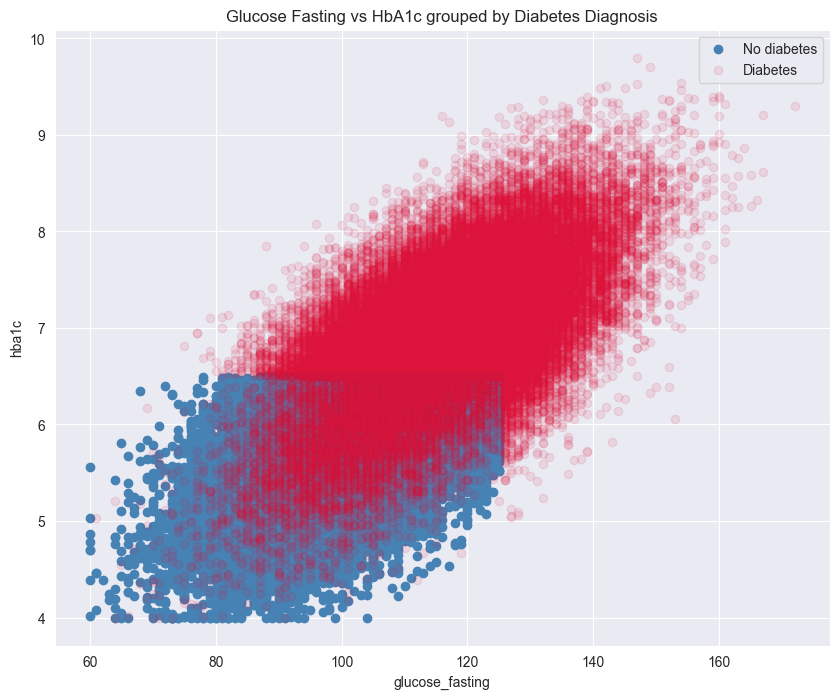

In [4]:
plt.figure(figsize=(10, 8))

diabetic = data[data['diagnosed_diabetes'] == 1]
non_diabetic = data[data['diagnosed_diabetes'] == 0]

plt.scatter(non_diabetic['glucose_fasting'], non_diabetic['hba1c'], 
            alpha=1, label='No diabetes', color='steelblue')

plt.scatter(diabetic['glucose_fasting'], diabetic['hba1c'], 
            alpha=0.1, label='Diabetes', color='crimson')

plt.xlabel('glucose_fasting')
plt.ylabel('hba1c')
plt.legend()
plt.title('Glucose Fasting vs HbA1c grouped by Diabetes Diagnosis')

plt.show()

The data follows established medical logic, and what may initially appear as a strange scatter plot is actually completely normal. Clinical criteria show that individuals without diabetes almost never exceed **6.4% HbA1c** or **125 mg/dL fasting glucose**. Therefore, the non-diabetic cluster is naturally confined within this range, which explains the sharp cutoff visible in the plot.

**Source (HbA1c diagnostic thresholds) and (Glucose fasting)**

American Diabetes Association (ADA). Diabetes Diagnosis Guidelines.

Available at: https://diabetes.org/about-diabetes/diagnosis

Available at: https://jamanetwork.com/journals/jamainternalmedicine/fullarticle/2775594?utm_source=chatgpt.com [mean age 75 years old]

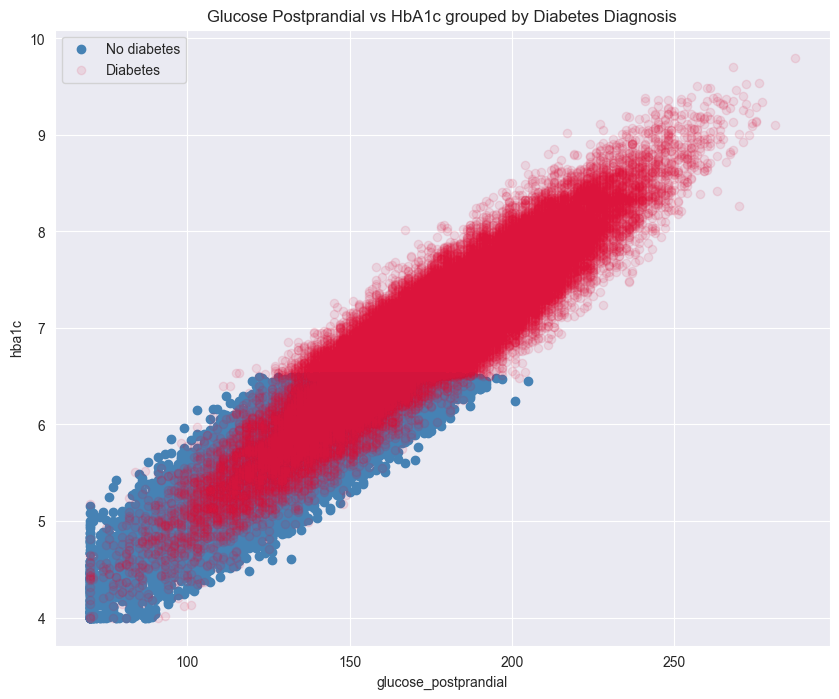

In [5]:
plt.figure(figsize=(10, 8))

diabetic = data[data['diagnosed_diabetes'] == 1]
non_diabetic = data[data['diagnosed_diabetes'] == 0]

plt.scatter(non_diabetic['glucose_postprandial'], non_diabetic['hba1c'], 
            alpha=1, label='No diabetes', color='steelblue')

plt.scatter(diabetic['glucose_postprandial'], diabetic['hba1c'], 
            alpha=0.1, label='Diabetes', color='crimson')

plt.xlabel('glucose_postprandial')
plt.ylabel('hba1c')
plt.legend()
plt.title('Glucose Postprandial vs HbA1c grouped by Diabetes Diagnosis')

plt.show()

**Postprandial Glucose (2-Hour After Meal)**

Clinical reference ranges are well established. In healthy, non-diabetic individuals, postprandial glucose levels almost never exceed 140 mg/dL (7.8 mmol/L) two hours after eating. 

This threshold defines a normal glycemic response. For individuals with diabetes, the American Diabetes Association (ADA) recommends keeping postprandial glucose below 180 mg/dL (10.0 mmol/L).

These limits naturally create a clearly confined cluster for non-diabetic participants, which does not extend beyond the <140 mg/dL range, explaining the sharp boundary visible in the scatter plot.

For individuals with diabetes, eating sugar is a problem because their bodies cannot use insulin effectively. As a result, sugary foods cause rapid spikes in blood glucose that cannot be properly controlled, leading to dangerously high levels.

#### Next, we examine the pairs of features with the highest correlation. The purpose of this step is to understand the distribution of these features and, if any anomalies appear, to inspect them further using a larger and more detailed scatter plot.

---

In [6]:
data.columns

Index(['age', 'gender', 'ethnicity', 'education_level', 'income_level',
       'employment_status', 'smoking_status', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp',
       'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol',
       'ldl_cholesterol', 'triglycerides', 'glucose_fasting',
       'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score',
       'diabetes_stage', 'diagnosed_diabetes'],
      dtype='object')

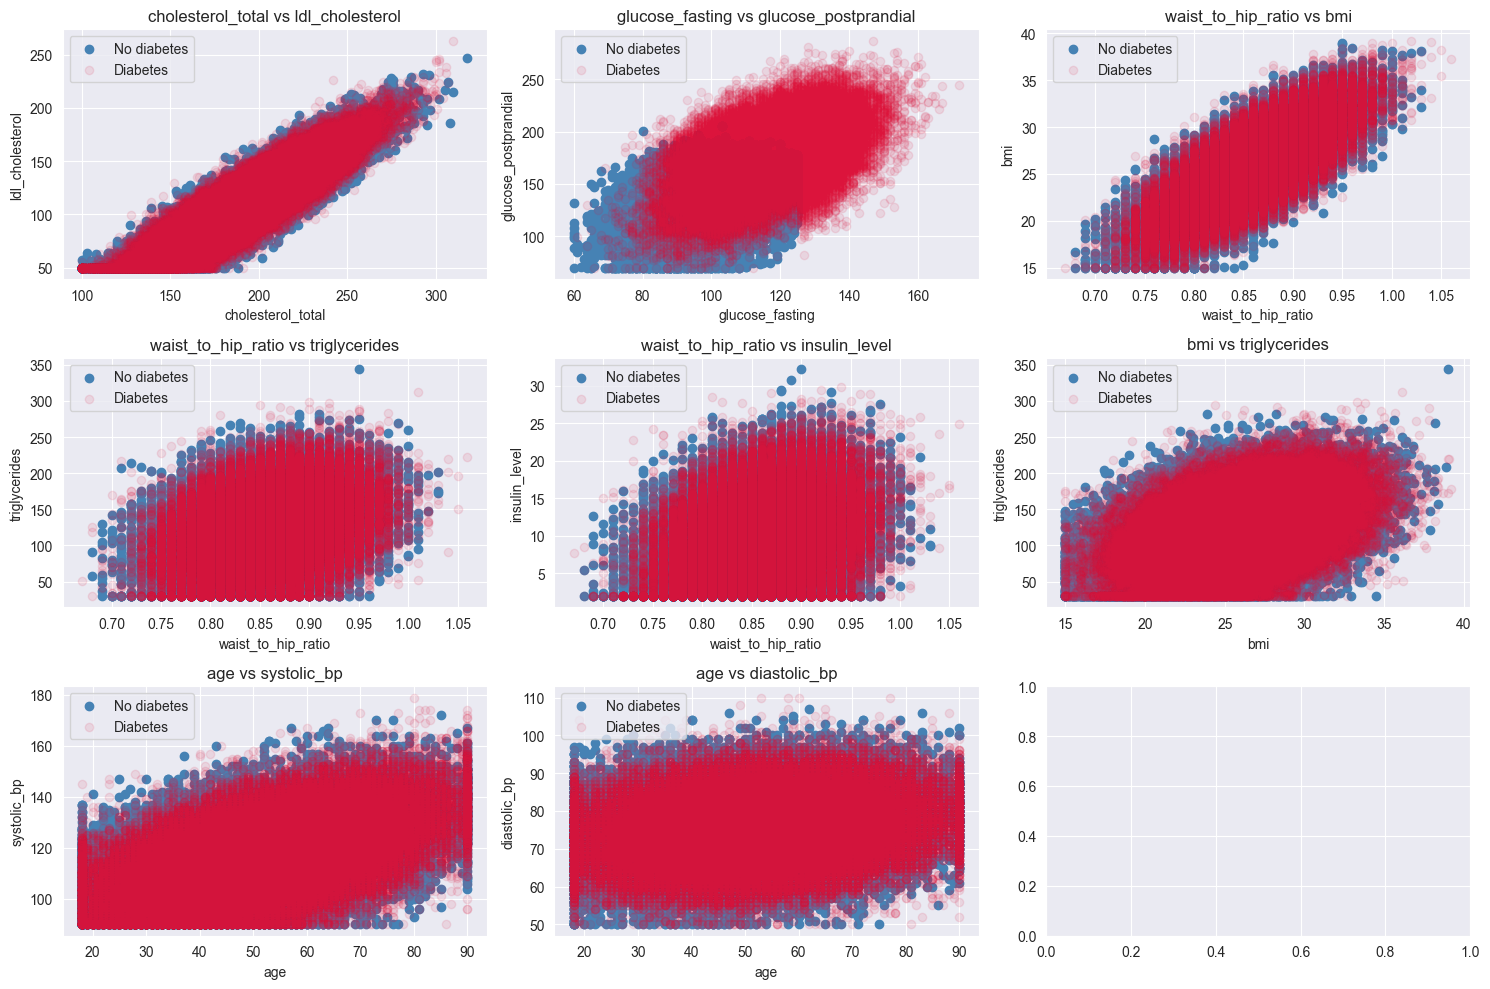

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10), )
axes = axes.flatten()

TARGET_COLUMN = 'diagnosed_diabetes'
duo_features = [
    ('cholesterol_total', 'ldl_cholesterol'),
    ('glucose_fasting', 'glucose_postprandial'),
    ('waist_to_hip_ratio', 'bmi'),
    ('waist_to_hip_ratio', 'triglycerides'),
    ('waist_to_hip_ratio', 'insulin_level'),
    ('bmi', 'triglycerides'),
    ('age', 'systolic_bp'),
    ('age', 'diastolic_bp'),
]

for ax, (f1, f2) in zip(axes, duo_features):
    
    diabetic = data[data[TARGET_COLUMN] == 1]
    non_diabetic = data[data[TARGET_COLUMN] == 0]

    ax.scatter(non_diabetic[f1], non_diabetic[f2], alpha=1, label='No diabetes', color='steelblue')
    ax.scatter(diabetic[f1], diabetic[f2], alpha=0.1, label='Diabetes', color='crimson')

    ax.set_xlabel(f1)
    ax.set_ylabel(f2)
    ax.set_title(f'{f1} vs {f2}')
    ax.legend()

plt.tight_layout()
plt.show()

In [8]:
data['systolic_bp'].mean()

np.float64(115.79961)

In [9]:
data['diastolic_bp'].mean()

np.float64(75.23249)

In the age vs. systolic blood pressure plot, we observe that slightly higher blood pressure appears to be more common among individuals who are not diagnosed with diabetes. This is only a hypothesis that requires further investigation. The conclusion is based solely on the patterns visible in the scatter plot.

#### We examine the distribution of all features to understand the structure of the data and determine the most appropriate scaling method. Features that are approximately normally distributed are typically scaled with StandardScaler, while skewed variables or those containing outliers are better handled with RobustScaler or MinMaxScaler.

---

In [10]:
def feature_distribution(dataset, feature, ax):
    
    ax.hist(dataset[feature], bins=20, edgecolor='black')
    
    ax.set_title(f'{feature} distribution')
    ax.set_xlabel(feature)
    ax.set_ylabel('count')

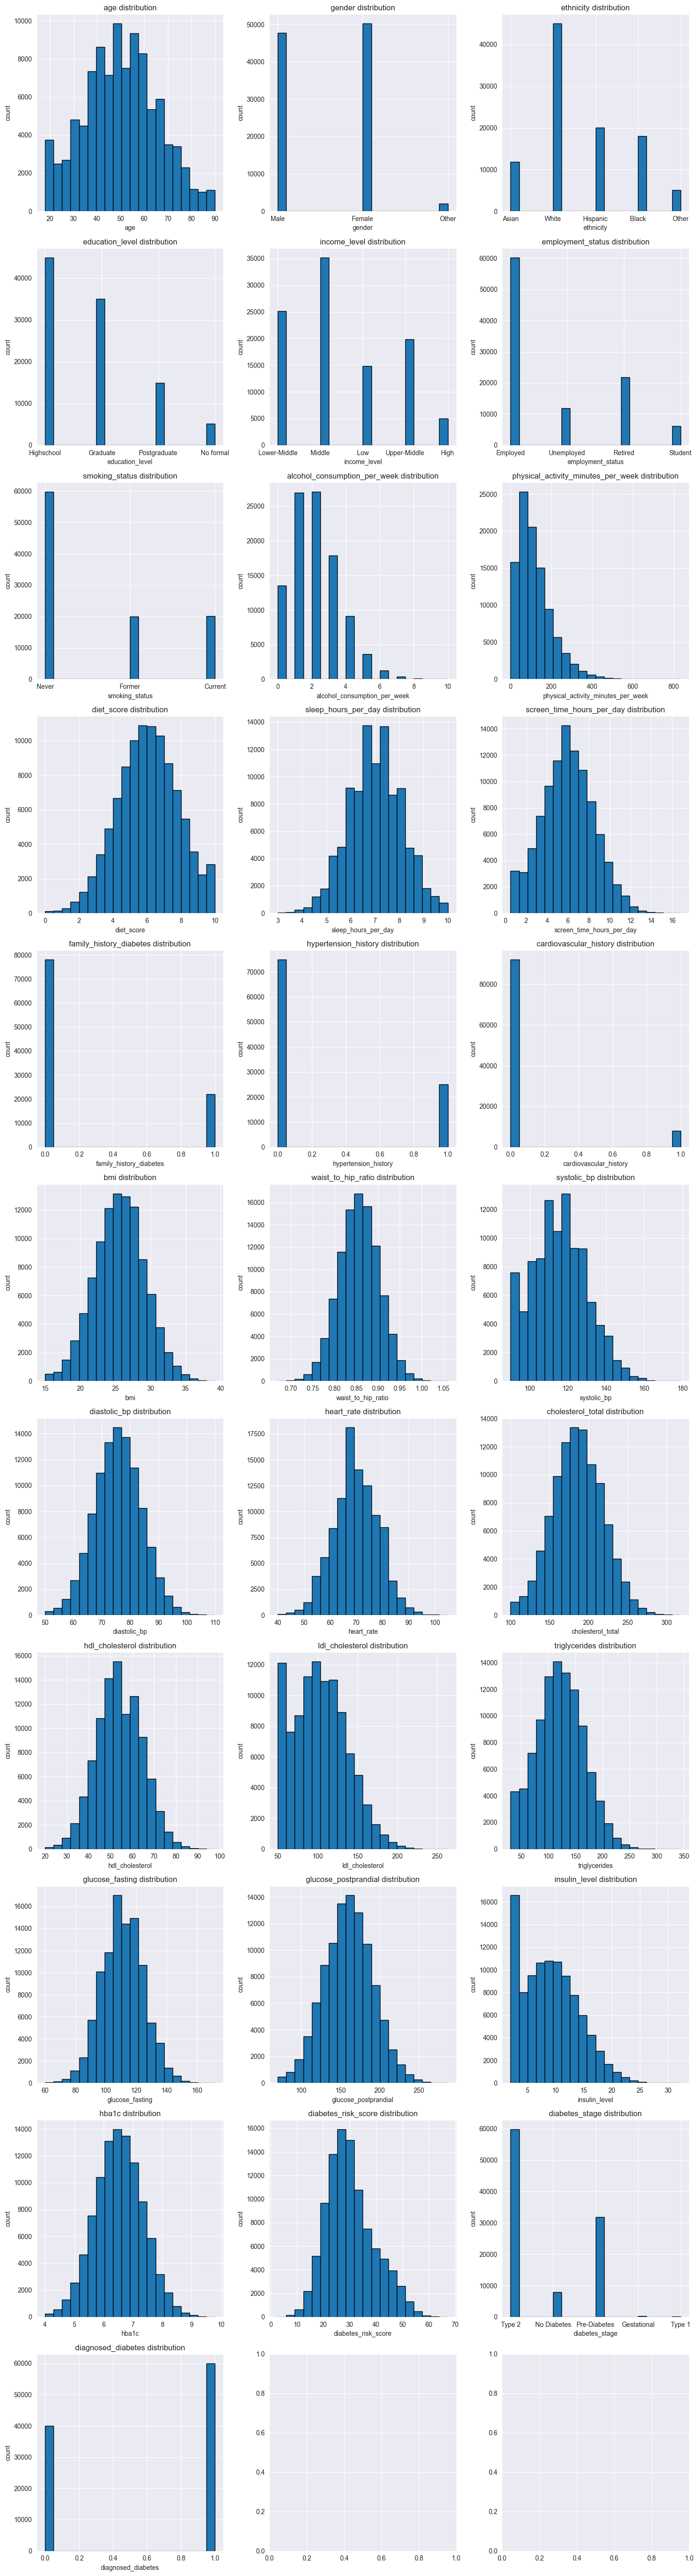

In [11]:
features = data.columns
rows = (len(features) + 2) // 3

fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    feature_distribution(data, feature, axes[i])

plt.tight_layout()
plt.show()